# Importing Libraries

In [1]:
mode = 0 # set mode 1 for editable plots and 0 for visible plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint

if mode == 1:
    # Required for pycairo
    !pip install pyproject-toml
    ! sudo apt install libcairo2-dev pkg-config python3-dev
    ! pip install pycairo

    import matplotlib
    matplotlib.use('cairo')

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Importing functions

In [3]:
def timeplot(t,z, save=None, row=2, figsize=(18,10)):
    color = ['r-']*z.shape[1]
    ylabel = ['$Sc_1$ ($mm^{-3}$)', '$Sc_2$ ($mm^{-3}$)', '$Sc_M$ ($mm^{-3}$)',
              'T cell ($mm^{-3}$)', 'Dendritic cell ($mm^{-3}$)', 'Keratinocyte ($mm^{-3}$)',
              r'$TNF-\alpha$', r'$TGF-\beta$', '$IL-23$', '$IL-17$', '$IL-10$']
    xlabel = ['Time (days)']*z.shape[1]
    col = z.shape[1]//row + 1

    plt.figure(figsize=figsize)
    for i in range(z.shape[1]):
        plt.subplot(row, col, i+1)
        plt.plot(t,z[:,i],color[i])
        plt.ylabel(ylabel[i])
        plt.xlabel(xlabel[i])
        axes[i].grid(True)
    if save == None:
        plt.show()
    else:
        plt.savefig(save)

In [4]:
def diffplot(t, res, length, lab, save=None):
    color = ['g-', 'b-', 'c-']
    ylabel = ["Activated T cells ($T_A$) /mm$^3$", " Activated Dendritic cells ($D_A$) /mm$^3$", "Keratinocytes ($K_C$) /mm$^3$",
    "TNF-α ($T_α$) pg/mm$^3$", "TGF-β ($T_β$) pg/mm$^3$", "IL-23 ($I_{23}$) pg/mm$^3$", "IL-17 ($I_{17}$) pg/mm$^3$", "IL-10 ($I_{10}$) pg/mm$^3$"]
    xlabel = ['Time (days)']*8

    plt.figure(figsize=(16,11))
    for i in range(8):
        plt.subplot(3, 3, i+1)
        for j in range(len(color)):
            plt.plot(t[:length],res[j][:length,i+3], color[j], label=lab[j])
        plt.ylabel(ylabel[i])
        plt.xlabel(xlabel[i])
        if i == 7:
          plt.legend()

    plt.tight_layout()

    if save == None:
        plt.show()
    else:
        plt.savefig(save)

In [5]:
def Limitplot(res, lab, save=None):
    color = ['g-', 'b-', 'c-']
    label = ["Activated T cells ($T_A$) /mm$^3$", " Activated Dendritic cells ($D_A$) /mm$^3$", "Keratinocytes ($K_C$) /mm$^3$"]
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    for i in range(3):
        ax.plot3D(res[i][500:,3], res[i][500:,4], res[i][500:,5], color[i])
    ax.set_xlabel(label[0])
    ax.set_ylabel(label[1])
    ax.set_zlabel(label[2])
    ax.view_init(elev=7., azim=240, roll=0)

    if save == None:
        plt.show()
    else:
        plt.savefig(save)

# Timeplots of population with impulse effect

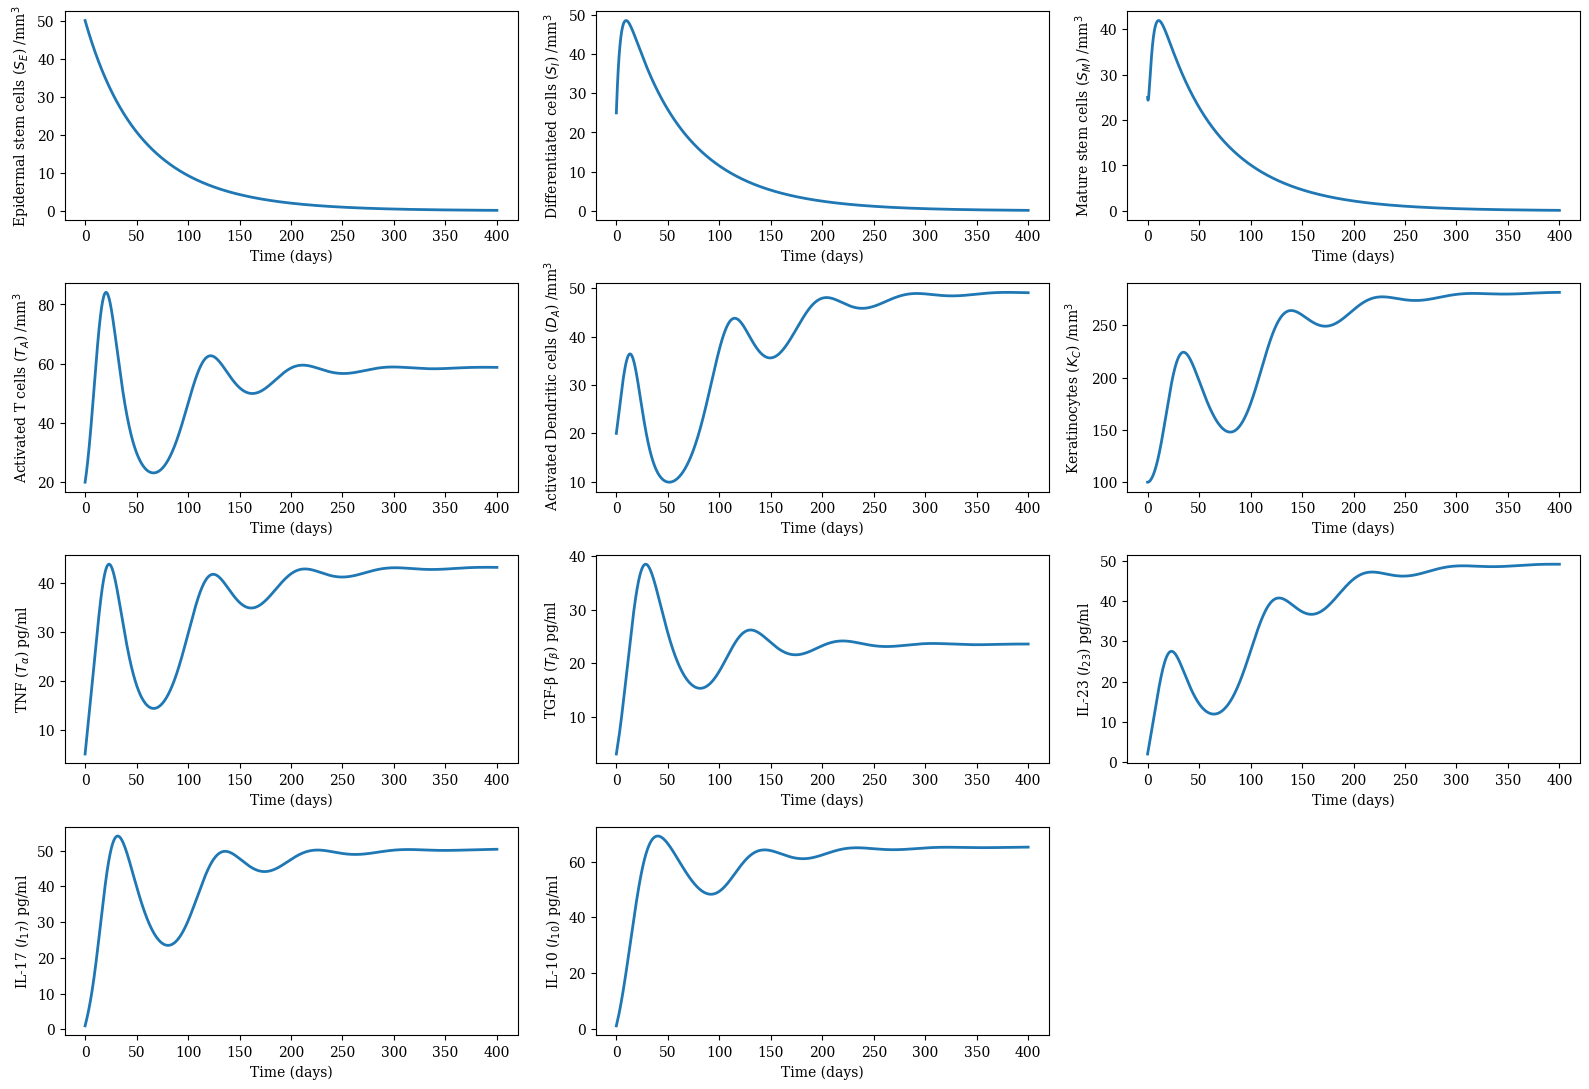

In [6]:
# t2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

parameters = {
    'α_S': 0.08, 'Smax': 1000, 'a1': 0.55, 'l1': 0.30, 'μ1': 0.125,
    'a2': 0.35, 'l2': 0.6, 'μ2': 0.053, 'μ3': 0.9,
    'α_T': 0.12, 'Tmax': 1000, 'ζ1': 0.06, 'ζ2': 0.07, 'δ1': 0.003, 'μT': 0.02,
    'α_D': 0.12, 'Dmax': 1000, 'δ2': 0.004, 'μD': 0.02,
    'α_K': 0.6, 'ζ3': 0.2, 'ζ4': 0.2, 'ζ5': 0.2, 'ω': 0.01, 'δ3': 0.001, 'μK': 0.02,
    'p1': 0.08, 'p2': 0.08, 'λ1': 0.2,
    'p3': 0.03, 'p4': 0.04, 'λ2': 0.1,
    'p5': 0.08, 'λ3': 0.08,
    'p6': 0.06, 'λ4': 0.07,
    'p7': 0.03, 'p8': 0.03, 'p9': 0.003, 'λ5': 0.04,
    'r1':0.05, 'E50':0.01
}


params = parameters.copy()


# Initial conditions
y0 = [50, 25, 25, 20, 20, 100, 5, 3, 2, 1, 1]

# Define the system of ODEs
def psoriasis_model(t, y):
    SE, SI, SM, TA, DA, KC, T_alpha, T_beta, IL23, IL17, IL10 = y
    p = params

    dydt = [
        p['α_S']*SE*(1 - SE/p['Smax']) + (2*p['a1'] - 1)*p['l1']*SE - p['μ1']*SE,
        (2*p['a2'] - 1)*p['l2']*SI + 2*(1 - p['a1'])*p['l1']*SE - p['μ2']*SI,
        2*(1 - p['a2'])*p['l2']*SI - p['μ3']*SM,
        p['α_T']*TA*(1 - TA/p['Tmax']) + p['ζ1']*T_alpha + p['ζ2']*IL23 - p['δ1']*IL10*TA - p['μT']*TA,
        p['α_D']*DA*(1 - DA/p['Dmax']) - p['δ2']*T_beta*DA - p['μD']*DA,
        p['α_K'] + (p['ζ3']*T_alpha + p['ζ4']*T_beta + p['ζ5']*IL17)/(1 + p['ω']*SM) - p['δ3']*IL10*KC - p['μK']*KC,
        p['p1']*TA + p['p2']*DA - p['λ1']*T_alpha,
        p['p3']*SM + p['p4']*TA - p['λ2']*T_beta,
        p['p5']*DA - p['λ3']*IL23,
        p['p6']*TA - p['λ4']*IL17,
        p['p7']*SM + p['p8']*TA + p['p9']*KC - p['λ5']*IL10
    ]
    return dydt

# Time span for simulation
t_span = (0, 400)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Solve the system
sol = solve_ivp(psoriasis_model, t_span, y0, t_eval=t_eval, rtol=1e-6)

# Variable names for plotting
labels = [
    "Epidermal stem cells ($S_E$) /mm$^3$", "Differentiated cells ($S_I$) /mm$^3$", "Mature stem cells ($S_M$) /mm$^3$",
    "Activated T cells ($T_A$) /mm$^3$", " Activated Dendritic cells ($D_A$) /mm$^3$", "Keratinocytes ($K_C$) /mm$^3$",
    "TNF ($T_α$) pg/ml", "TGF-β ($T_β$) pg/ml", "IL-23 ($I_{23}$) pg/ml", "IL-17 ($I_{17}$) pg/ml", "IL-10 ($I_{10}$) pg/ml"
]

# Plot using subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 11))
axes = axes.flatten()

for i in range(len(labels)):
    axes[i].plot(sol.t, sol.y[i], lw=2)
    axes[i].set_xlabel('Time (days)')
    axes[i].set_ylabel(labels[i], fontsize=10)

# Hide the last subplot if not used
for j in range(len(labels), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

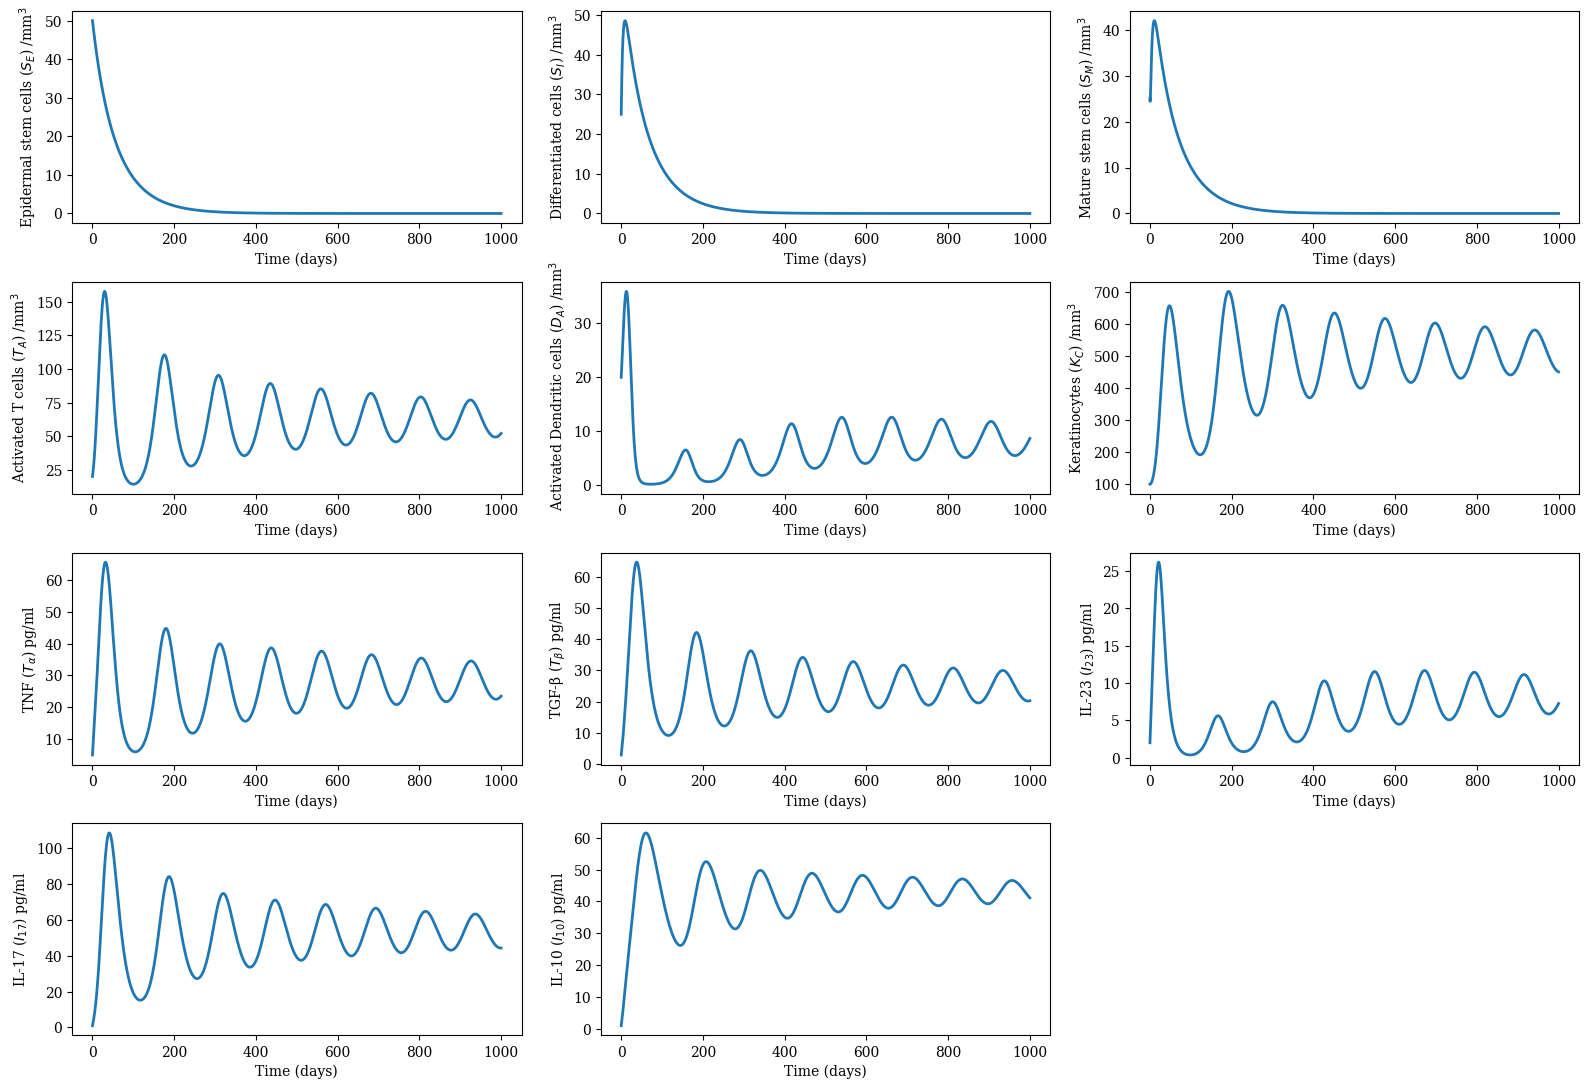

In [7]:
# t3
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

parameters = {
    'α_S': 0.08, 'Smax': 1000, 'a1': 0.55, 'l1': 0.30, 'μ1': 0.125,
    'a2': 0.35, 'l2': 0.6, 'μ2': 0.053, 'μ3': 0.9,
    'α_T': 0.12, 'Tmax': 1000, 'ζ1': 0.06, 'ζ2': 0.07, 'δ1': 0.003, 'μT': 0.02,
    'α_D': 0.12, 'Dmax': 1000, 'δ2': 0.004, 'μD': 0.02,
    'α_K': 0.6, 'ζ3': 0.2, 'ζ4': 0.2, 'ζ5': 0.4, 'ω': 0.01, 'δ3': 0.001, 'μK': 0.02,
    'p1': 0.08, 'p2': 0.08, 'λ1': 0.2,
    'p3': 0.03, 'p4': 0.04, 'λ2': 0.1,
    'p5': 0.08, 'λ3': 0.08,
    'p6': 0.06, 'λ4': 0.07,
    'p7': 0.03, 'p8': 0.003, 'p9': 0.003, 'λ5': 0.04
}

params = parameters.copy()


# Initial conditions
y0 = [50, 25, 25, 20, 20, 100, 5, 3, 2, 1, 1]

# Define the system of ODEs
def psoriasis_model(t, y):
    SE, SI, SM, TA, DA, KC, T_alpha, T_beta, IL23, IL17, IL10 = y
    p = params

    dydt = [
        p['α_S']*SE*(1 - SE/p['Smax']) + (2*p['a1'] - 1)*p['l1']*SE - p['μ1']*SE,
        (2*p['a2'] - 1)*p['l2']*SI + 2*(1 - p['a1'])*p['l1']*SE - p['μ2']*SI,
        2*(1 - p['a2'])*p['l2']*SI - p['μ3']*SM,
        p['α_T']*TA*(1 - TA/p['Tmax']) + p['ζ1']*T_alpha + p['ζ2']*IL23 - p['δ1']*IL10*TA - p['μT']*TA,
        p['α_D']*DA*(1 - DA/p['Dmax']) - p['δ2']*T_beta*DA - p['μD']*DA,
        p['α_K'] + (p['ζ3']*T_alpha + p['ζ4']*T_beta + p['ζ5']*IL17)/(1 + p['ω']*SM) - p['δ3']*IL10*KC - p['μK']*KC,
        p['p1']*TA + p['p2']*DA - p['λ1']*T_alpha,
        p['p3']*SM + p['p4']*TA - p['λ2']*T_beta,
        p['p5']*DA - p['λ3']*IL23,
        p['p6']*TA - p['λ4']*IL17,
        p['p7']*SM + p['p8']*TA + p['p9']*KC - p['λ5']*IL10
    ]
    return dydt

# Time span for simulation
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Solve the system
sol = solve_ivp(psoriasis_model, t_span, y0, t_eval=t_eval, rtol=1e-6)

# Variable names for plotting
labels = [
    "Epidermal stem cells ($S_E$) /mm$^3$", "Differentiated cells ($S_I$) /mm$^3$", "Mature stem cells ($S_M$) /mm$^3$",
    "Activated T cells ($T_A$) /mm$^3$", " Activated Dendritic cells ($D_A$) /mm$^3$", "Keratinocytes ($K_C$) /mm$^3$",
    "TNF ($T_α$) pg/ml", "TGF-β ($T_β$) pg/ml", "IL-23 ($I_{23}$) pg/ml", "IL-17 ($I_{17}$) pg/ml", "IL-10 ($I_{10}$) pg/ml"
]

# Plot using subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 11))
axes = axes.flatten()

for i in range(len(labels)):
    axes[i].plot(sol.t, sol.y[i], lw=2)
    axes[i].set_xlabel('Time (days)')
    axes[i].set_ylabel(labels[i], fontsize=10)
    #axes[i].grid(True)

# Hide the last subplot if not used
for j in range(len(labels), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

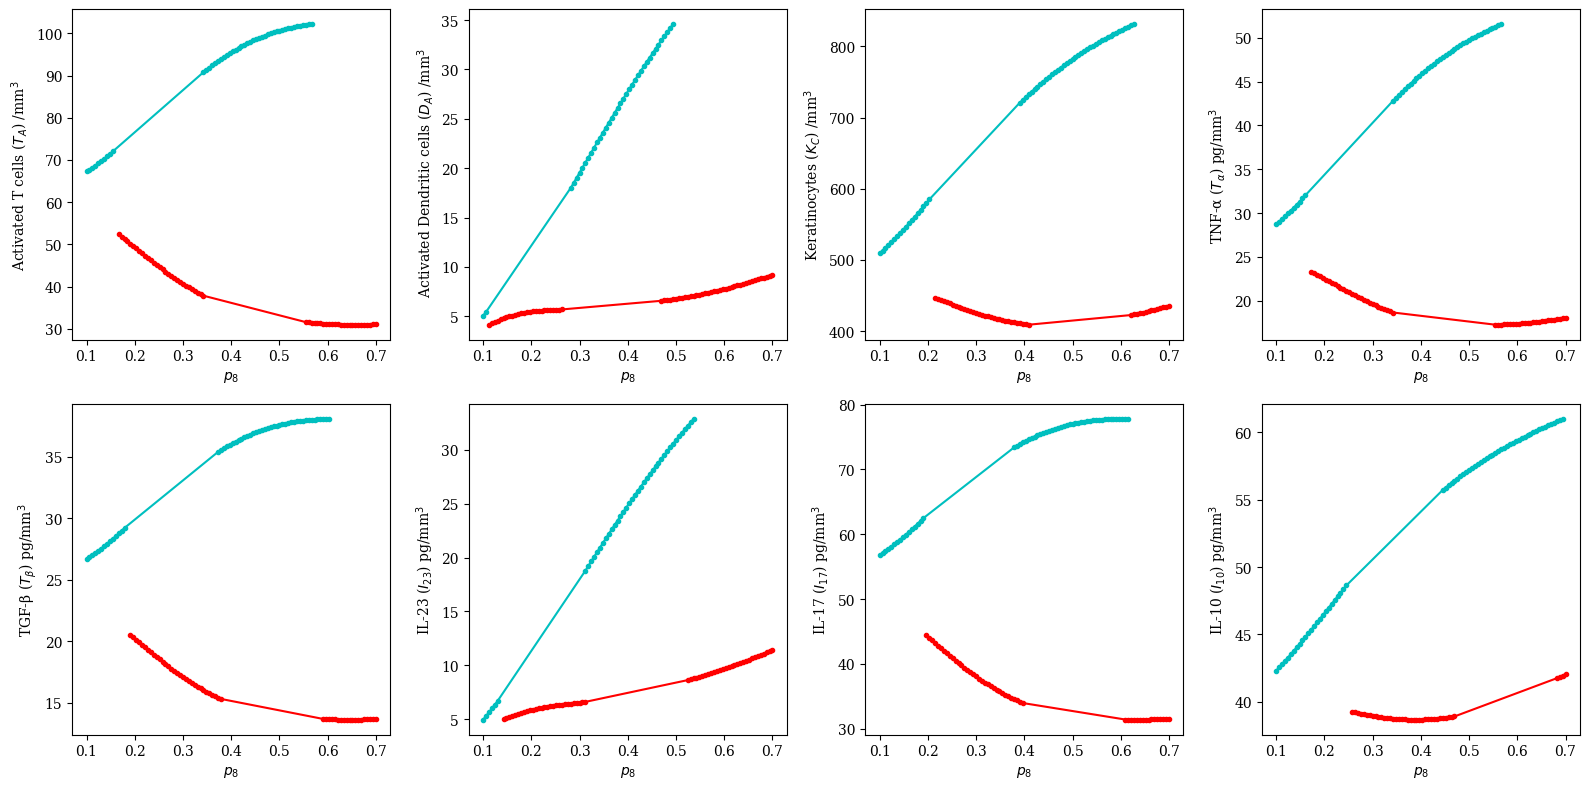

In [8]:
p8 = np.linspace(0.1,0.7,100)
pts_p8_c1 = []
pts_p8_c2 = []
for p8s in p8:
    params['ζ4'] = p8s
    z = solve_ivp(psoriasis_model, t_span, y0, t_eval=t_eval, rtol=1e-6)
    z = z['y'].T
    for i in range(8):
        for j in range(max(z.shape[0]-300,0), z.shape[0]-1):
            if z[j,i+3]-z[j+1,i+3]>0 and z[j,i+3]-z[j-1,i+3]>0:
                pts_p8_c1.append([p8s, z[j,i+3], i])
            if z[j,i+3]-z[j+1,i+3]<0 and z[j,i+3]-z[j-1,i+3]<0:
                pts_p8_c2.append([p8s, z[j,i+3], i])

ylabel = [
    "Activated T cells ($T_A$) /mm$^3$", " Activated Dendritic cells ($D_A$) /mm$^3$", "Keratinocytes ($K_C$) /mm$^3$",
    "TNF-α ($T_α$) pg/mm$^3$", "TGF-β ($T_β$) pg/mm$^3$", "IL-23 ($I_{23}$) pg/mm$^3$", "IL-17 ($I_{17}$) pg/mm$^3$", "IL-10 ($I_{10}$) pg/mm$^3$"
]
xlabel = ['$p_8$']*8
pts_p8_c1 = np.array(pts_p8_c1)
pts_p8_c2 = np.array(pts_p8_c2)
fig, ax = plt.subplots(2, 4, figsize=(16,8))
ax = ax.flatten()
for i in range(8):
    sub_c1 = pts_p8_c1[pts_p8_c1[:,2] == i]
    sub_c2 = pts_p8_c2[pts_p8_c2[:,2] == i]
    ax[i].plot(sub_c1[:,0], sub_c1[:,1], '-co', ms=3)
    ax[i].plot(sub_c2[:,0], sub_c2[:,1], '-ro', ms=3)
    ax[i].set_ylabel(ylabel[i])
    ax[i].set_xlabel(xlabel[i])

plt.tight_layout()
if mode == 1:
    plt.savefig('Biffurcation_p8s.pdf')
else:
    plt.show()

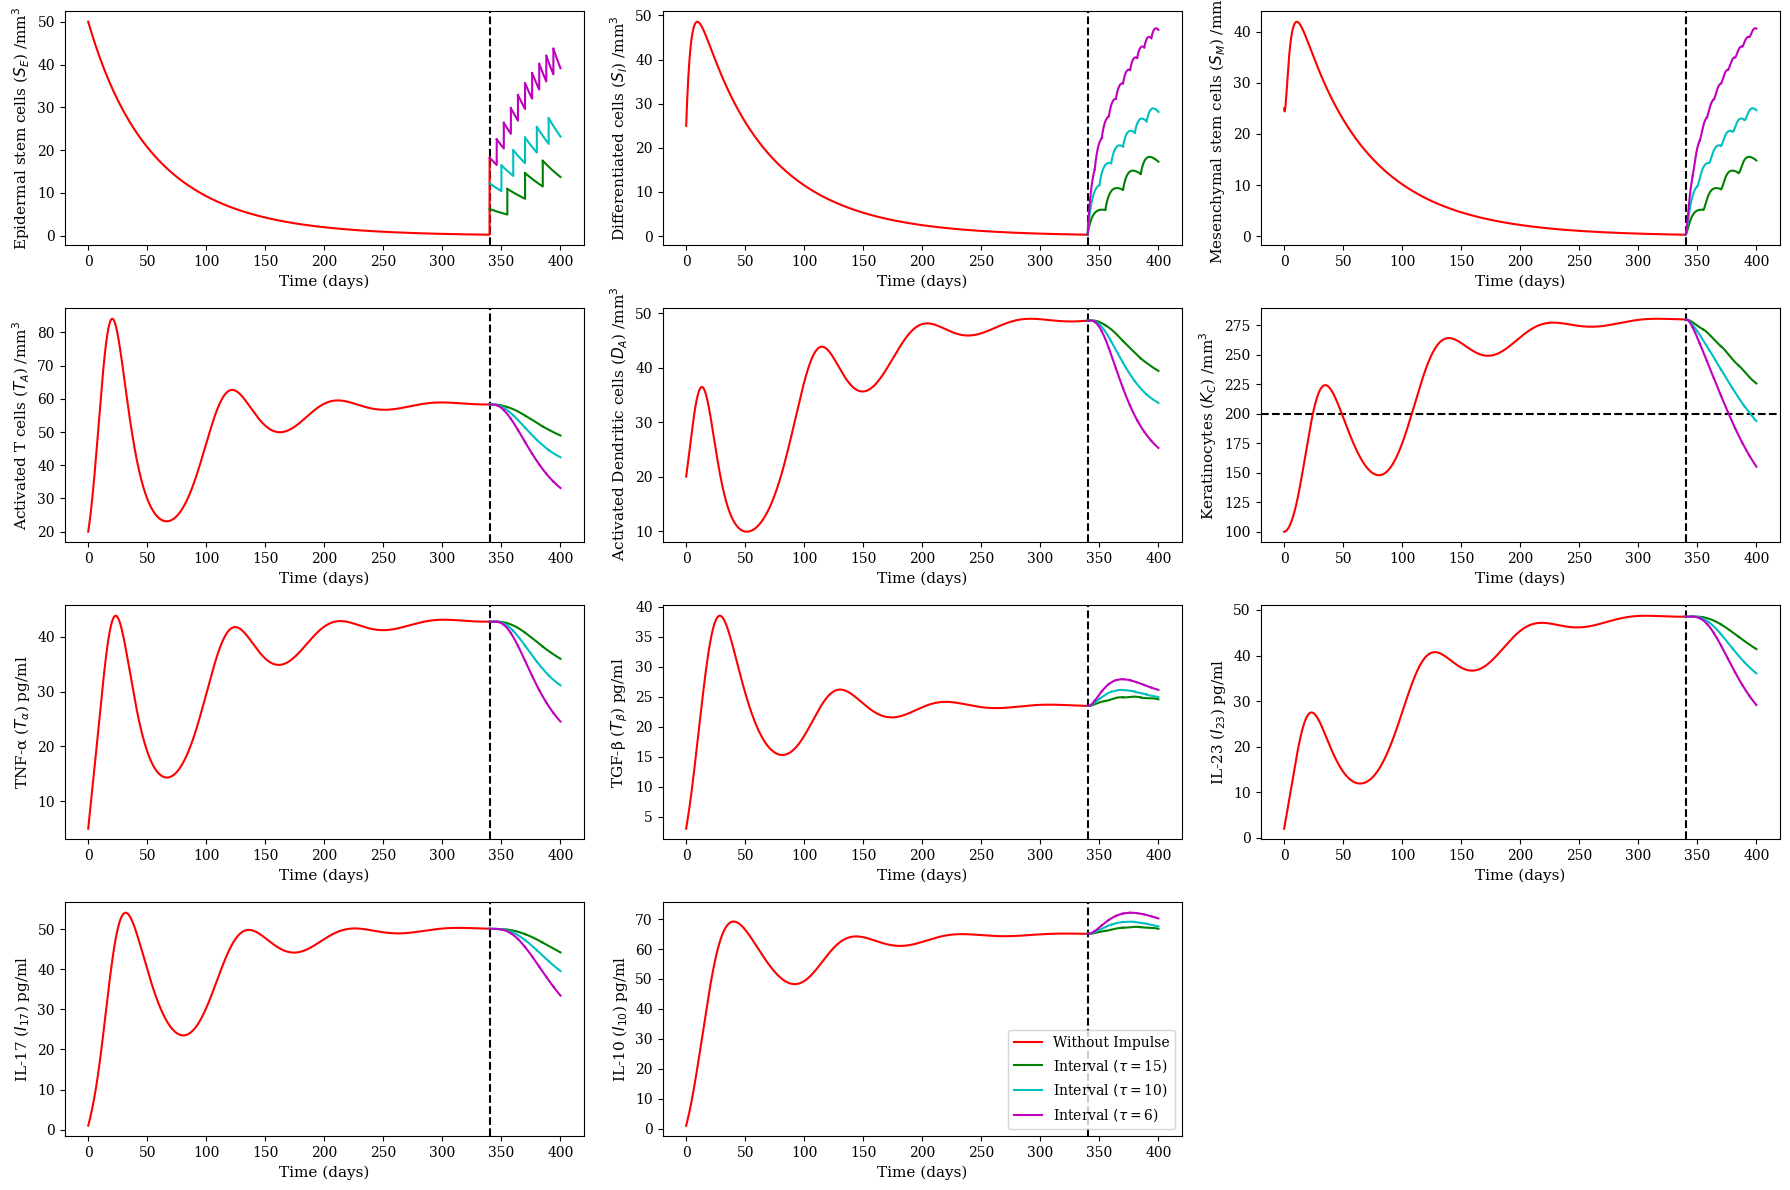

In [9]:
dose=6; reps=[4, 6, 10]; tau=[15, 10, 6];

params = {
    'α_S': 0.08, 'Smax': 1000, 'a1': 0.55, 'l1': 0.30, 'μ1': 0.125,
    'a2': 0.35, 'l2': 0.6, 'μ2': 0.053, 'μ3': 0.9,
    'α_T': 0.12, 'Tmax': 1000, 'ζ1': 0.06, 'ζ2': 0.07, 'δ1': 0.003, 'μT': 0.02,
    'α_D': 0.12, 'Dmax': 1000, 'δ2': 0.004, 'μD': 0.02,
    'α_K': 0.6, 'ζ3': 0.2, 'ζ4': 0.2, 'ζ5': 0.2, 'ω': 0.01, 'δ3': 0.001, 'μK': 0.02,
    'p1': 0.08, 'p2': 0.08, 'λ1': 0.2,
    'p3': 0.03, 'p4': 0.04, 'λ2': 0.1,
    'p5': 0.08, 'λ3': 0.08,
    'p6': 0.06, 'λ4': 0.07,
    'p7': 0.03, 'p8': 0.03, 'p9': 0.003, 'λ5': 0.04
}


t_span = (0, 340)
t_eval = np.linspace(t_span[0], t_span[1], 5000)
z = solve_ivp(psoriasis_model, t_span, y0, t_eval=t_eval, rtol=1e-6)

z_total = [[z['t'],z['y'].T]]

for ta, r in zip(tau, reps):
    ztemp = z_total[0][-1]
    ttemp = z_total[0][0]
    for i in range(r):
        z_init = ztemp[-1]
        z_init[0] = z_init[0] + dose
        t_span = (ttemp[-1], ttemp[-1]+ta)
        t_eval = np.linspace(t_span[0], t_span[1], 5000)
        z = solve_ivp(psoriasis_model, t_span, z_init, t_eval=t_eval, rtol=1e-6)
        z_total.append([z['t'],z['y'].T])
        ztemp = z_total[-1][-1]
        ttemp = z_total[-1][0]

dim = range(z['y'].T.shape[1])
color = ['g-']*reps[0] + ['c-']*reps[1] + ['m-']*reps[2]
ylabel = ["Epidermal stem cells ($S_E$) /mm$^3$", "Differentiated cells ($S_I$) /mm$^3$", "Mesenchymal stem cells ($S_M$) /mm$^3$",
    "Activated T cells ($T_A$) /mm$^3$", " Activated Dendritic cells ($D_A$) /mm$^3$", "Keratinocytes ($K_C$) /mm$^3$",
    "TNF-α ($T_α$) pg/ml", "TGF-β ($T_β$) pg/ml", "IL-23 ($I_{23}$) pg/ml", "IL-17 ($I_{17}$) pg/ml", "IL-10 ($I_{10}$) pg/ml"]
xlabel = ['Time (days)']*len(dim)
repslabel = ['Interval '+r'$(\tau = $'+str(int(ta)) + ')' for ta in tau]
row = 4
col = z['y'].T.shape[1] // row + 1

plt.figure(figsize=(18,12))
count = 1
for i in dim:
    plt.subplot(row, col, count)
    plt.axvline(x = 340, color = 'k', linestyle = '--')
    if i == 5:
        plt.axhline(y = 200, color = 'k', linestyle = '--')
    plt.plot(z_total[0][0],z_total[0][1][:,i], 'r-', label='Without Impulse')
    sub = 0
    for ta, rl, r in zip(tau, repslabel, reps):
        for j in range(r):
            if i == dim[-1]:
                plt.plot(z_total[sub+1][0],z_total[sub+1][1][:,i], color[sub], label=rl)
            else:
                plt.plot(z_total[sub+1][0],z_total[sub+1][1][:,i], color[sub])
            sub = sub+1
    plt.ylabel(ylabel[i], fontsize=11)
    plt.xlabel(xlabel[i], fontsize=11)
    count = count+1
    plt.tight_layout()
    if i == dim[-1]:
      handles, labels = plt.gca().get_legend_handles_labels()
      by_label = dict(zip(labels, handles))
      plt.legend(by_label.values(), by_label.keys(), loc=4)

params = parameters.copy()

if mode == 1:
    plt.savefig('Diffimpulse.pdf', dpi=300)
else:
    plt.show()
